In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'


In [4]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [31]:
total_alpha_content = [ i / 1000 for i in range( 1 , 999 ) ]
total_flat_content  = [ i for i in range(1 , 10  ) ]
total_location      = list(range( 5 , 16))

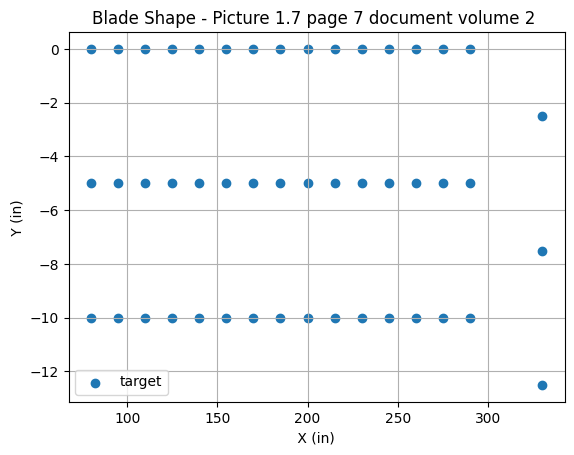

In [32]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [26]:
df_points = pd.DataFrame(points , columns = ['X' , 'Y' , 'Z' ] )
df_points

,X,Y,Z
0,80,0.0,0
1,80,-5.0,0
2,80,-10.0,0
3,95,0.0,0
4,95,-5.0,0
5,95,-10.0,0
6,110,0.0,0
7,110,-5.0,0
8,110,-10.0,0
9,125,0.0,0


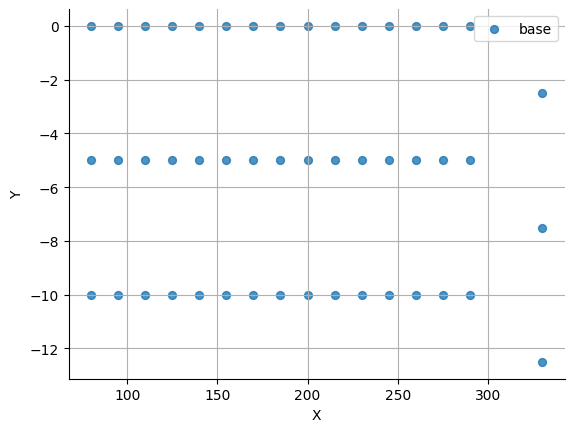

In [27]:
# @title X vs Y

from matplotlib import pyplot as plt
df_points.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8 , label='base' )
plt.legend()
plt.grid()
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
pd.read_csv(total_file_link[1])

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0461,0.0026,-0.0097,0.0013,-0.0257,0.0040
1,0.2499,-0.0144,0.0018,-0.0203,0.0037,-0.0192,0.0076
2,0.2998,-0.0400,0.0016,-0.0418,0.0060,-0.1072,0.0122
3,0.3498,-0.0571,0.0020,-0.0768,0.0110,-0.1795,0.0212
4,0.3913,-0.0664,0.0028,-0.1086,0.0159,-0.2527,0.0285
5,0.4496,-0.1061,0.0031,-0.1347,0.0206,-0.4375,0.0392
6,0.4997,-0.1311,0.0028,-0.1545,0.0245,-0.6278,0.0494
7,0.5387,-0.1628,0.0030,-0.1719,0.0275,-0.8450,0.0571
8,0.5996,-0.2103,0.0032,-0.1914,0.0330,-1.1901,0.0681
9,0.6498,-0.2343,0.0032,-0.2095,0.0368,-1.6110,0.0788


In [33]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,
    'accuracy_random_forest' : []

}


In [34]:
for iter_alpha in total_alpha_content :
  if iter_alpha == 0.001 :
    break
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health  = []
    params_fault   = []
    params_fault_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(2):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location = 0

          total_health_iter  = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []


          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              if select_location == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add










              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])

          fig = plt.figure(figsize=(30 , 10 ))
          ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          ax3 = fig.add_subplot(1 , 6 , 4 )
          ax4 = fig.add_subplot(1 , 6 , 5 )
          ax5 = fig.add_subplot(1 , 6 , 6 )

          total_health_iter = np.array(total_health_iter)
          total_health_iter = np.array(total_health_iter)
          total_fault_iter = np.array(total_fault_iter)
          total_fault_t_iter = np.array(total_fault_t_iter)
          print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")
          ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='H' , c='r' , s = 30   )
          ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='F1' , c ='b'  , s = 30  )
          ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='F1' , c ='b', s = 30    )
          ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='F2' , c='r' , s = 30 )
          ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='F2' , c='r'  , s = 30  )

          ax3.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  ,       label='H' , c ='b' )
          ax3.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  ,       label='F1' , c ='r' )

          ax4.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  ,       label='H' , c ='b' )
          ax4.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F2' , c='r')

          ax5.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  ,       label='F1' , c ='b' )
          ax5.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F2' , c='r')

          ax0.legend()
          ax0.grid()
          ax1.legend()
          ax1.grid()
          ax2.legend()
          ax2.grid()
          ax3.legend()
          ax3.grid()

          ax4.legend()
          ax4.grid()
          ax5.legend()
          ax5.grid()

          plt.show()




          new_data_simulated_        = np.array(new_data_simulated_)
          new_data_simulated_fault   = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t = np.array(new_data_simulated_fault_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error = []
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error.append(error)


          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]
          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  1 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = []
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault.append(error_Fault)

          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, mean_squared_error(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]




#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'error' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )



    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'error' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'error' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )







    concat_2_df_health_fault = pd.concat([df_params , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)
    classifier_1 = RandomForestClassifier()
    classifier_1.fit(x_u_train , y_u_train )
    pre_random = classifier_1.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)


    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")





  if iter_alpha > 0.09 :
    break

In [18]:
concat_2_df_health_fault

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,error,locate,class,alpha,flap
0,2.091209,0.0,-0.830045,-0.131285,2.760533,0.014281,-0.119855,0.015900,5,0.0,0.004,1.0
1,2.129692,0.0,-1.081687,-0.305237,3.194910,0.317921,-0.112353,0.128383,5,0.0,0.004,1.0
2,2.118535,0.0,-0.684152,-0.109039,2.654335,0.073257,-0.056560,0.024981,5,0.0,0.004,1.0
3,2.058402,0.0,-0.855688,-0.069752,2.768115,0.014531,-0.048543,0.094993,5,0.0,0.004,1.0
4,2.134995,0.0,-0.901138,-0.085218,2.898069,0.075757,-0.022557,0.036277,5,0.0,0.004,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.471868,0.0,-1.196229,-0.129826,2.742105,0.074870,-0.095054,6.715243,15,2.0,0.004,1.0
326,1.473843,0.0,-1.196963,-0.227622,2.820531,0.224692,-0.068512,5.013638,15,2.0,0.004,1.0
327,1.468296,0.0,-1.074756,-0.114441,2.590122,0.071146,-0.043385,3.217916,15,2.0,0.004,1.0
328,1.472081,0.0,-1.189177,-0.242599,2.775928,0.157863,-0.120265,4.430457,15,2.0,0.004,1.0


In [12]:
pd.DataFrame(total_simulation)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,accuracy_random_forest
0,0.012415,NaN,-0.038849,-0.021778,0.047424,-0.010695,-0.039382,0.001,1,0.590909,0.641414
1,0.004669,NaN,-0.009518,0.051696,0.004433,-0.034804,0.041734,0.001,2,0.656566,0.671717
2,0.005858,NaN,-0.032593,0.004934,0.032018,-0.020835,-0.001914,0.001,3,0.702020,0.702020
3,0.008666,NaN,-0.017798,-0.012495,0.025578,-0.006764,-0.019815,0.001,4,0.666667,0.621212
4,0.010632,NaN,-0.048701,-0.013020,0.061029,0.012081,-0.005055,0.001,5,0.666667,0.686869
...,...,...,...,...,...,...,...,...,...,...,...
85,0.024570,NaN,-0.040515,0.075215,0.049284,-0.077950,0.044992,0.010,5,0.666667,0.717172
86,0.021585,NaN,-0.003129,-0.007032,0.034315,0.034543,0.017850,0.010,6,0.646465,0.651515
87,0.026086,NaN,-0.029587,0.007554,0.052823,-0.010626,0.005651,0.010,7,0.666667,0.727273
88,0.026938,NaN,-0.088739,0.021007,0.102279,-0.041012,-0.007107,0.010,8,0.712121,0.707071


In [20]:
df_t = pd.DataFrame(new_data_simulated_ , columns = ['X' , 'Y' , 'Z' ] )

In [33]:
pd.DataFrame(x_poly_fault_t)

,0,1,2,3,4,5
0,1.0,79.955601,0.013657,6392.898167,1.091978,0.000187
1,1.0,79.956236,-4.986687,6392.999695,-398.716709,24.867045
2,1.0,79.956898,-9.986494,6393.105588,-798.489074,99.730060
3,1.0,95.016194,0.023441,9028.077038,2.227261,0.000549
4,1.0,95.015655,-4.974092,9027.974628,-472.616632,24.741594
5,1.0,95.017884,-9.972864,9028.398308,-947.600430,99.458015
6,1.0,110.043605,0.044660,12109.595021,4.914579,0.001995
7,1.0,110.041355,-4.939468,12109.099768,-543.545713,24.398341
8,1.0,110.043569,-9.952080,12109.587113,-1095.162438,99.043903
9,1.0,125.057200,0.095683,15639.303211,11.965850,0.009155


In [21]:
df_t

,X,Y,Z
0,79.955601,0.013657,0.016824
1,79.956236,-4.986687,0.012290
2,79.956898,-9.986494,0.021245
3,95.016194,0.023441,0.026809
4,95.015655,-4.974092,0.000334
5,95.017884,-9.972864,0.015818
6,110.043605,0.044660,0.059894
7,110.041355,-4.939468,0.093218
8,110.043569,-9.952080,0.091224
9,125.057200,0.095683,0.109777


from matplotlib import pyplot as plt
df_t['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_t['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_t['Z'].plot(kind='hist', bins=20, title='Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x='Y', y='Z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_t['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_t['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_t['Z'].plot(kind='line', figsize=(8, 4), title='Z')
plt.gca().spines[['top', 'right']].set_visible(False)

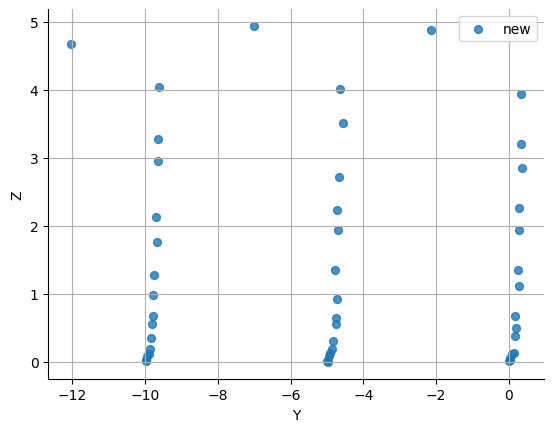

In [31]:
from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x='Y', y='Z', s=32, alpha=.8 , label='new' )
plt.legend()
plt.grid()
plt.gca().spines[['top', 'right',]].set_visible(False)

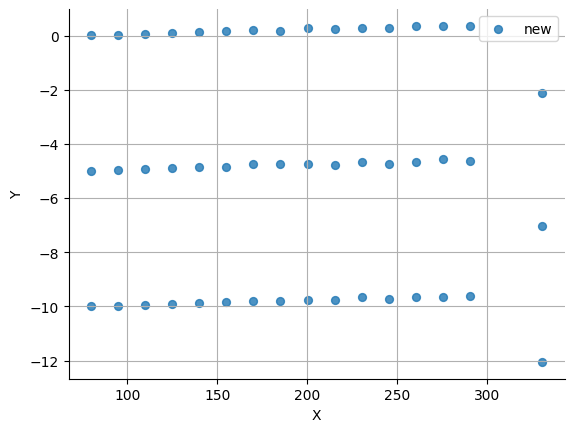

In [30]:
from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8 , label='new' )
plt.grid()
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)

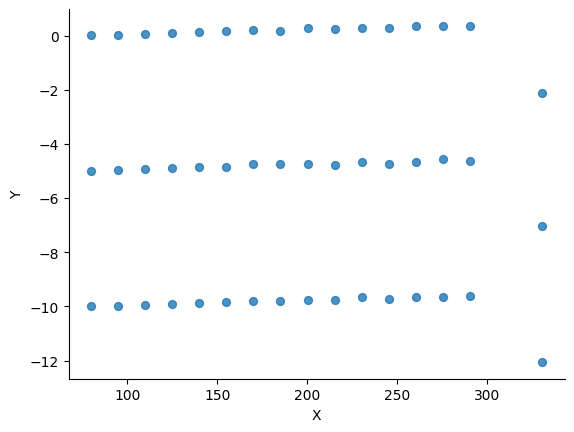

In [22]:
# @title X vs Y

from matplotlib import pyplot as plt
df_t.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pd.DataFrame(total_simulation)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,accuracy_random_forest
0,0.028671,NaN,-0.264934,-0.142173,0.274581,0.139115,-0.101049,0.001,1,0.55,0.65
1,0.009118,NaN,0.073107,-0.072983,-0.034025,0.084490,-0.033649,0.001,2,0.65,0.45
2,0.006197,NaN,-0.198469,-0.115107,0.188742,0.046408,-0.123319,0.001,3,0.75,0.75
3,0.005657,NaN,-0.111376,-0.007102,0.103926,0.006417,-0.016279,0.001,4,0.80,0.85
4,0.007273,NaN,-0.135722,-0.020975,0.163306,0.086901,0.037696,0.001,5,0.65,0.60
5,-0.002113,NaN,-0.076183,-0.014026,0.074825,0.043875,0.031003,0.001,6,0.55,0.45
6,0.008967,NaN,-0.050606,0.010065,0.053263,-0.073388,-0.044062,0.001,7,0.70,0.65
7,0.007113,NaN,-0.133248,0.010320,0.136965,0.034750,0.043743,0.001,8,0.75,0.70
8,0.016919,NaN,-0.097533,0.035130,0.121847,0.052602,0.081507,0.001,9,0.65,0.65
9,0.006358,NaN,-0.039523,0.092860,0.052539,-0.035599,0.092909,0.002,1,0.45,0.50


In [ ]:
df_fault

,X_,Y_,Z_
0,79.959374,0.014502,0.018280
1,79.955547,-4.985575,0.013881
2,79.958562,-9.990302,0.013052
3,95.018183,0.024275,0.008483
4,95.017301,-4.979920,0.013564
5,95.014168,-9.974853,0.007537
6,110.044927,0.050402,0.081703
7,110.042004,-4.951390,0.105535
8,110.042008,-9.953053,0.091274
9,125.052570,0.101824,0.112759


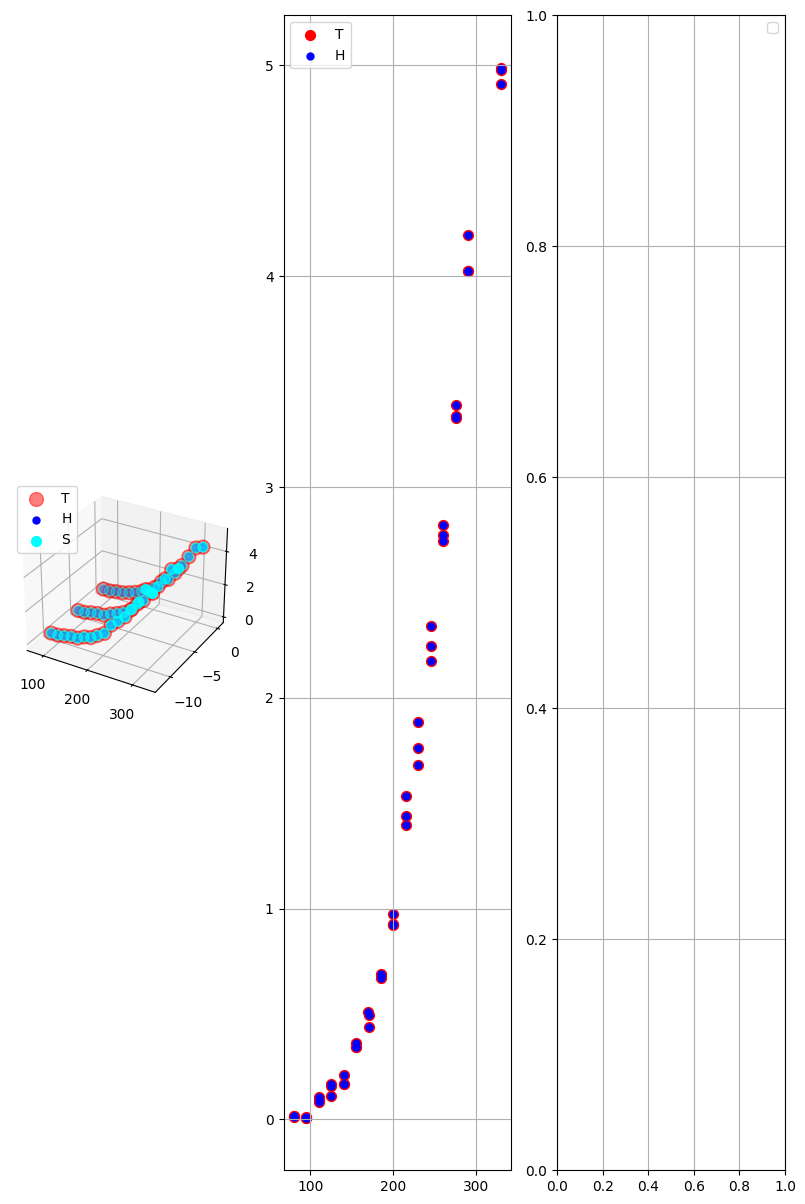

In [ ]:
fig = plt.figure(figsize=( 10 , 15  ))
ax10 = fig.add_subplot( 1 , 3 , 1 , projection='3d' )
ax11 = fig.add_subplot( 1 , 3 , 2  )
ax12 = fig.add_subplot( 1 , 3 , 3  )
ax10.scatter3D(df_fault_t.iloc[ : , 0 ] , df_fault_t.iloc[: , 1 ] , df_fault_t.iloc[: , 2 ] , label = 'T' , c = 'r' , s = 100 , alpha=0.5  )
ax10.scatter3D(df_health.iloc[ : , 0 ] , df_health.iloc[: , 1 ] , df_health.iloc[: , 2 ] , label = 'H'  , c = 'b' , s = 25 )
ax10.scatter3D(df_fault.iloc[ : , 0 ] , df_fault.iloc[: , 1 ] , df_fault.iloc[: , 2 ] , label = 'S'  , c ='aqua' , s = 50 )

ax11.scatter(df_fault_t.iloc[ : , 0 ] ,  df_fault_t.iloc[: , 2 ] , s = 50 , c = 'r' , label='T'  )
ax11.scatter(df_health.iloc[ : , 0 ]  ,  df_health.iloc[: , 2 ]  , s = 25 , c = 'b' , label='H'  )
ax11.legend()
ax11.grid()

ax12.legend()
ax12.grid()
ax10.legend()
ax10.grid()
plt.show()


In [ ]:
df_table_change

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0434,0.0026,-0.0126,0.0013,-0.0162,0.0040
1,0.2499,-0.0157,0.0019,-0.0235,0.0031,-0.0061,0.0079
2,0.2998,-0.0418,0.0016,-0.0514,0.0053,-0.0781,0.0130
3,0.3498,-0.0550,0.0016,-0.0961,0.0091,-0.1268,0.0216
4,0.3913,-0.0646,0.0024,-0.1332,0.0133,-0.1839,0.0303
5,0.4496,-0.1020,0.0026,-0.1704,0.0173,-0.3251,0.0405
6,0.4997,-0.1255,0.0030,-0.2004,0.0207,-0.4803,0.0503
7,0.5387,-0.1535,0.0028,-0.2193,0.0230,-0.6758,0.0569
8,0.5996,-0.1964,0.0031,-0.2466,0.0273,-0.9893,0.0678
9,0.6498,-0.2235,0.0031,-0.2726,0.0316,-1.3829,0.0783
